<a href="https://colab.research.google.com/github/joaodath/trilha_dados/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Aula 16 - Introdução ao DeepLearning](https://blueedtech.gitbook.io/modulo-3-dados/4a-semana/aula_19#2-perceptron)

In [1]:
# instalando e atualizando bibliotecas

%pip install -U pandas numpy sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#importando bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from tensorflow import keras



In [5]:
# dataset source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = data.drop('output', axis=1)
y = data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [14]:
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

Considerando o dataset Heart Attack Analysis & Prediction Dataset, construa uma rede Perceptron que tenha a mesma quantidade de classes como neurônios na sua camada de saída. Treine esta rede por 100 épocas e obtenha a acurácia de teste. Para o treinamento faça um split no conjunto para que 80% do conjunto inicial seja treinamento e utilize um batch size de 10 com função de ativação ReLU.

Aqui, definimos a sequência na estruturação do modelo:

criação da estruturas (sequential)

conferência da estrutura (summary)

definição das métricas (metrics)

geração da rede (compile)

In [10]:
# criando o modelo Perceptron
from tensorflow import keras

model1 = keras.Sequential(
    [
        #camada densa indica neurônios totalmente conectados (quantidade, ativação, formato da entrada)
        keras.layers.Dense(X_train.shape[1], activation="relu", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# a primeira camada possui 182 parâmetros: X referentes a w (13 atributos e 13 pesos) e 13 referentes ao bias
# a segunda camada possui 14 parâmetros : 13 referentes a w e 1 referente ao bias
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [40]:
#definindo as métricas de avaliação e treinando o modelo
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp")
]

model1.compile(loss="binary_crossentropy", metrics=['accuracy'])

In [42]:
history1 = model1.fit(X_train, y_train, batch_size=10, epochs=100, verbose=False)

In [43]:
score = model1.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 8ms/step - loss: 0.7449 - accuracy: 0.7377


[0.7449199557304382, 0.7377049326896667]

In [44]:
history2 = model1.fit(X_train, y_train, batch_size=5, epochs=150, verbose=False)

In [45]:
score = model1.evaluate(X_test, y_test)
score


2/2 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8361


[0.46662575006484985, 0.8360655903816223]

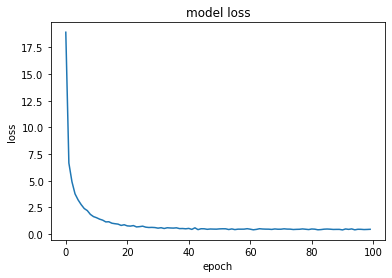

In [13]:
# visualizando a convergência da rede durante o treinamento
import matplotlib.pyplot as plt
plt.plot(history1.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

1.a) Para este conjunto de dados e modelo, a função de perda (loss) se mantém instável.

Varie a configuração do modelo (batch size e quantidade de épocas) e verifique se a performance melhora ou piora.

In [ ]:
## code source: https://www.kaggle.com/code/shujunge/gridsearchcv-with-keras/notebook
## doc on gridsearchcv: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
## todo: adapt: https://github.com/adriangb/scikeras
# def create_model(optimizer='rmsprop', init='glorot_uniform'):
#     model = Sequential()
#     model.add(Dense(512, input_shape=(784,)))
#     model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
#     model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
#     model.add(Dense(512,init=init))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(10,init=init))
#     model.add(Activation('softmax')) # This special "softmax" a
#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
#     return model
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.grid_search import GridSearchCV
# start=time()
# model = KerasClassifier(build_fn=create_model)
# optimizers = ['rmsprop', 'adam']
# init = ['glorot_uniform', 'normal', 'uniform']
# epochs = np.array([50, 100, 150])
# batches = np.array([5, 10, 20])
# param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
# grid = GridSearchCV(estimator=model, param_grid=param_grid)
# grid_result = grid.fit(X_train, Y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))
# print("total time:",time()-start)

In [17]:
def create_model():
  model = keras.Sequential(
      [
          #camada densa indica neurônios totalmente conectados (quantidade, ativação, formato da entrada)
          keras.layers.Dense(13, activation="relu", input_shape=(13,)),
          keras.layers.Dense(1, activation="sigmoid"),
      ]
    )
  # metrics = [
  #   keras.metrics.FalseNegatives(name="fn"),
  #   keras.metrics.FalsePositives(name="fp"),
  #   keras.metrics.TrueNegatives(name="tn"),
  #   keras.metrics.TruePositives(name="tp")
  #   ]

  model.compile(loss="binary_crossentropy", metrics=['accuracy'])
  return model

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
model = KerasClassifier(build_fn=create_model)
epochs = np.array([10, 50, 100, 150, 300])
batches = np.array([5, 10, 20, 30])
param_grid = dict(nb_epoch=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [35]:
grid_result = grid.fit(X_train, y_train)



49/49 [==============================] - 1s 2ms/step - loss: 12.0821 - accuracy: 0.5455


In [ ]:
# for params, mean_score, scores in grid_result.grid_scores_:
#     print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

In [36]:
grid_result.best_params_

{'batch_size': 5, 'nb_epoch': 150}

In [37]:
grid_result.best_score_

0.5984693884849548